In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [2]:
import os

folder_path = './datasets'  # 📁 Replace with your actual folder path

# Get all file names ending with '.csv' and store in a list
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
csv_files[0]


'2026 QS World University Rankings.csv'

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4


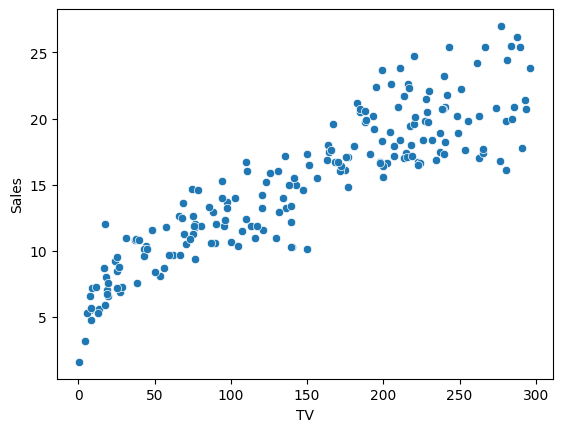

In [3]:
dataset = pd.read_csv(f"./datasets/{csv_files[1]}")
sns.scatterplot(x=dataset['TV'],y=dataset['Sales'])
print(dataset.head(2))

In [4]:
input = dataset.iloc[:,:-1]
output = dataset['Sales']
from sklearn.model_selection import train_test_split
x_tran,x_test,y_tran,y_test = train_test_split(input,output,test_size=0.25,random_state=43)
from sklearn.linear_model import LinearRegression ,Lasso, Ridge 
lr = LinearRegression()
lr.fit(x_tran,y_tran)
y_lr_prd = lr.predict(x_test)
print(f"LinearRegression % = {lr.score(x_test,y_test)*100}")
lasso = Lasso(alpha=0.5)
lasso.fit(x_tran,y_tran)
y_lasso_prd = lasso.predict(x_test)

print(f"Lasso % = {lasso.score(x_test,y_test)*100}")
ridge = Ridge(alpha=0.5)
ridge.fit(x_tran,y_tran)
y_ridge_prd = lasso.predict(x_test)
print(f"Ridge % = {ridge.score(x_test,y_test)*100}")


LinearRegression % = 93.26911013425052
Lasso % = 93.21963546821814
Ridge % = 93.26907017810228


In [5]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , root_mean_squared_error , r2_score
mae = mean_absolute_error(y_test,y_lr_prd)
mse = mean_squared_error(y_test,y_lr_prd)
rmse = root_mean_squared_error(y_test,y_lr_prd)
r2 = r2_score(y_test,y_lr_prd)
mae , mse , rmse , r2 , y_test.mean() , y_lr_prd.mean()

(1.0403683212881072,
 1.9204362268836634,
 1.3857980469331248,
 0.9326911013425052,
 np.float64(15.054),
 np.float64(14.776843757306079))

Bynomal Logisitic regression

In [6]:

dataset = pd.read_csv(f"./datasets/Iris.csv")
# print(dataset['Species'].unique())
# print(dataset.head(1))
dataset['Species'] = (dataset['Species']!='Iris-setosa').astype(np.int32)
# sns.scatterplot(x=dataset['Species'],y=dataset['PetalLengthCm'])
input = dataset.iloc[:,[1]]
output = dataset['Species']
from sklearn.model_selection import train_test_split#4 9
x_tran,x_test,y_tran,y_test = train_test_split(input,output,test_size=0.25,random_state=200)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_tran,y_tran)
lr.score(x_test,y_test)*100 ,lr.predict([[1000]])

c:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(86.8421052631579, array([1], dtype=int32))

MultiNomial Logisitic Regration

In [7]:
dataset = pd.read_csv(f"./datasets/Iris.csv")
# print(dataset['Species'].unique())
# dataset.drop(columns='Id',inplace=True)
mapValue = {'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2}
input = dataset.iloc[:,1:-1]
dataset['Species'] = dataset['Species'].map(mapValue)
# sns.scatterplot(dataset)
from sklearn.model_selection import train_test_split
x_tran,x_test,y_tran,y_test = train_test_split(input,output,test_size=0.25,random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_tran,y_tran)
lr.score(x_test,y_test)*100

100.0

Polynomial Logisitic Regression

In [8]:
dataset = pd.read_csv(f"./datasets/Iris.csv")
# print(dataset['Species'].unique())
# dataset.drop(columns='Id',inplace=True)
randomArray = np.random.randint(0,150,10)
data_test = dataset.iloc[randomArray]
print(data_test)
mapValue = {'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2}
input = dataset.iloc[:,1:-1]
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
pf.fit(input)
input = pd.DataFrame(pf.transform(input))
dataset['Species'] = dataset['Species'].map(mapValue)
# sns.scatterplot(dataset)
from sklearn.model_selection import train_test_split
x_tran,x_test,y_tran,y_test = train_test_split(input,output,test_size=0.25,random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_tran,y_tran)
lr.score(x_test,y_test)*100

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
105  106            7.6           3.0            6.6           2.1   
78    79            6.0           2.9            4.5           1.5   
18    19            5.7           3.8            1.7           0.3   
38    39            4.4           3.0            1.3           0.2   
129  130            7.2           3.0            5.8           1.6   
109  110            7.2           3.6            6.1           2.5   
27    28            5.2           3.5            1.5           0.2   
149  150            5.9           3.0            5.1           1.8   
132  133            6.4           2.8            5.6           2.2   
144  145            6.7           3.3            5.7           2.5   

             Species  
105   Iris-virginica  
78   Iris-versicolor  
18       Iris-setosa  
38       Iris-setosa  
129   Iris-virginica  
109   Iris-virginica  
27       Iris-setosa  
149   Iris-virginica  
132   Iris-virginica  

100.0

Multicalss Classification

In [9]:
dataset = pd.read_csv(f"./datasets/Iris.csv")
# print(dataset['Species'].unique())
# dataset.drop(columns='Id',inplace=True)
mapValue = {'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2}
input = dataset.iloc[:,1:-1]
dataset['Species'] = dataset['Species'].map(mapValue)
# sns.scatterplot(dataset)
from sklearn.model_selection import train_test_split
x_tran,x_test,y_tran,y_test = train_test_split(input,output,test_size=0.25,random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr')
lr.fit(x_tran,y_tran)
lr.score(x_test,y_test)*100

c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


100.0

In [10]:
dataset = pd.read_csv(f"./datasets/Iris.csv")
# print(dataset['Species'].unique())
# dataset.drop(columns='Id',inplace=True)
mapValue = {'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2}
input = dataset.iloc[:,1:-1]
dataset['Species'] = dataset['Species'].map(mapValue)
# sns.scatterplot(dataset)
from sklearn.model_selection import train_test_split
x_tran,x_test,y_tran,y_test = train_test_split(input,output,test_size=0.25,random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial')
lr.fit(x_tran,y_tran)
lr.score(x_test,y_test)*100

c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


100.0

Confusion Matrix or Error Matrix , Precision , Recall, R1-score

In [11]:
dataset = pd.read_csv(f'datasets/{csv_files[12]}')
dataset.head(3)
input = dataset.iloc[:,:-1]
dataset['price_range'] = (dataset['price_range']>=2).astype(np.int64)
output = dataset['price_range']
from sklearn.model_selection import train_test_split
x_tran,x_test,y_tran,y_test = train_test_split(input,output,test_size=0.25,random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_tran,y_tran)
lr_score = lr.score(x_test,y_test)*100
from sklearn.metrics import confusion_matrix , accuracy_score  , precision_score , recall_score , f1_score
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
tn , fp , fn , tp = cm.ravel()
ac = accuracy_score(y_test,y_pred)*100
er = ((fn+fp)/(tp+fp+fn+tp))*100
ps = precision_score(y_test,y_pred)*100
rc = recall_score(y_test,y_pred)*100
f1s = f1_score(y_test,y_pred)*100
print(f"accuracy_score = {ac} , error = {er} , precision_score = {ps} , recall_score = {rc} , f1_score = {f1s} , tn = {tn} ,tp = {tp} , fp = {fp} , fn = {fn} , Logisitc Regrestion Score = {lr_score}")
sns.heatmap(cm,annot=True)

KeyError: 'price_range'

ImBalance Dataset
  Random under sampling 
  Random over sampling 
using imblearn

In [ ]:
dataset = pd.read_csv(f'datasets/{csv_files[12]}')
dataset.head(3)
input = dataset.iloc[:,:-1]
dataset['price_range'] = (dataset['price_range']>0).astype(np.int64)
output = dataset.iloc[:,-1]
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_data1 , y_data1 = rus.fit_resample(input,output)
print(f"Orignal data -----> 1's = {np.sum(output == 1)}, 0's = {np.sum(output == 0)}")
print(f"Created Data RUS -----> 1's = {np.sum(y_data1==1)} , 0's = {np.sum(y_data1==0)}")

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_data2 , y_data2 = ros.fit_resample(input,output)
print(f"Created Data ROS -----> 1's = {np.sum(y_data2==1)} , 0's = {np.sum(y_data2==0)}")

Orignal data -----> 1's = 1500, 0's = 500
Created Data RUS -----> 1's = 500 , 0's = 500
Created Data ROS -----> 1's = 1500 , 0's = 1500


simple example own douplicat-created data

In [ ]:
d1 = np.random.randint(0,1,80)
d2 = np.random.randint(1,2,20)
input = np.linspace(0,10000,500).reshape(100,-1)
output = np.concatenate((d1,d2))
input , output
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_data1 , y_data1 = rus.fit_resample(input,output)
print(f"Orignal data -----> 1's = {np.sum(output == 1)}, 0's = {np.sum(output == 0)}")
print(f"Created Data RUS -----> 1's = {np.sum(y_data1==1)} , 0's = {np.sum(y_data1==0)}")

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_data2 , y_data2 = ros.fit_resample(input,output)
print(f"Created Data ROS -----> 1's = {np.sum(y_data2==1)} , 0's = {np.sum(y_data2==0)}")
print(input.size , output.size)
print(x_data1.size , y_data1.size)
print(x_data2.size , y_data2.size)

Orignal data -----> 1's = 20, 0's = 80
Created Data RUS -----> 1's = 20 , 0's = 20
Created Data ROS -----> 1's = 80 , 0's = 80
500 100
200 40
800 160


Naive bayes types,
    Gaussion, Multinomial , Bernoulli 

In [82]:
dataset = pd.read_csv('datasets/Iris.csv')
dataset['Species'] = dataset['Species'].map(mapValue).astype(np.int64)
input = dataset.iloc[:,1:3]
output = dataset['Species']
# sns.kdeplot(input)
# dataset

from sklearn.model_selection import train_test_split
x_tran,x_test,y_tran,y_test = train_test_split(input,output,test_size=0.25,random_state=42)
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
gnb = GaussianNB()
gnb.fit(x_tran,y_tran)
print(f"Gaussian navie Bayes = {gnb.score(x_test,y_test)*100}")

dataset = pd.read_csv(f'datasets/{csv_files[4]}')
mapYesNo = {'No':0,'Yes':1}
dataset['Internship_Experience'] = dataset['Internship_Experience'].map(mapYesNo).astype(np.int64)
dataset['Placement'] = dataset['Placement'].map(mapYesNo).astype(np.int64)
d1 = dataset.drop(columns=['College_ID','Prev_Sem_Result','CGPA'])
input = d1.iloc[:,:-1]
output = d1['Placement']
x_tran,x_test,y_tran,y_test = train_test_split(input,output,test_size=0.25,random_state=4)
mnb = MultinomialNB()
mnb.fit(x_tran,y_tran)
print(f"Multinomial navie Bayes {mnb.score(x_test,y_test)*100}")

bnb = BernoulliNB()
bnb.fit(x_tran,y_tran)
print(f"Bernoulli navie Bayes {bnb.score(x_test,y_test)*100}")

Gaussian navie Bayes = 84.21052631578947
Multinomial navie Bayes 83.08
Bernoulli navie Bayes 83.56
